In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取數據
df = pd.read_csv('C:/python-training/eyeglad/Amazon/data/marketing/240711_AmazonSales_OverFitGlasses.csv')


In [13]:
# 移除商品定價中的美元符號並轉換為浮點數
# replace_str = ['$', '.(.5.86 / Count)', '.(.6.66 / Count)', '.(.63.61 / Pound)', '.(.78.35 / Pound)', '.(.9.00 / Count)', '.FREE Returns', '.(.0.87 / Gram)', '.FREE International Returns']
# for i in replace_str:
#     df['Price'] = df['Price'].astype(str).str.replace(i, '')
df['Price'] = df['Price'].astype(str).str.replace('$', '')
df['Price'] = df['Price'].astype(str).str.replace(' ', '.')
df['Price'] = df['Price'].astype(str).str.replace('\n', '.')

# 處理評分數量
df['Star Rating'] = df['Star Rating'].str.replace('沒有星等', '0')
replace_star = [',',' rating']
for i in replace_star:
    df['Global Rating Count'] = df['Global Rating Count'].str.replace(i, '')
df['Global Rating Count'] = df['Global Rating Count'].astype(int)

# 計算加權平均評分
df['Weighted Rating'] = df['Star Rating'].astype(float) * df['Global Rating Count']


Top 10 品牌根據評分數多且評分高:
Index(['NoCry', 'SUNGAIT', 'MERRY'S', 'NORPERWIS', 'LifeArt', 'Gaoye',
       'FEISEDY', 'MEETSUN', 'DUCO', 'Joopin'],
      dtype='object', name='Brand Name')


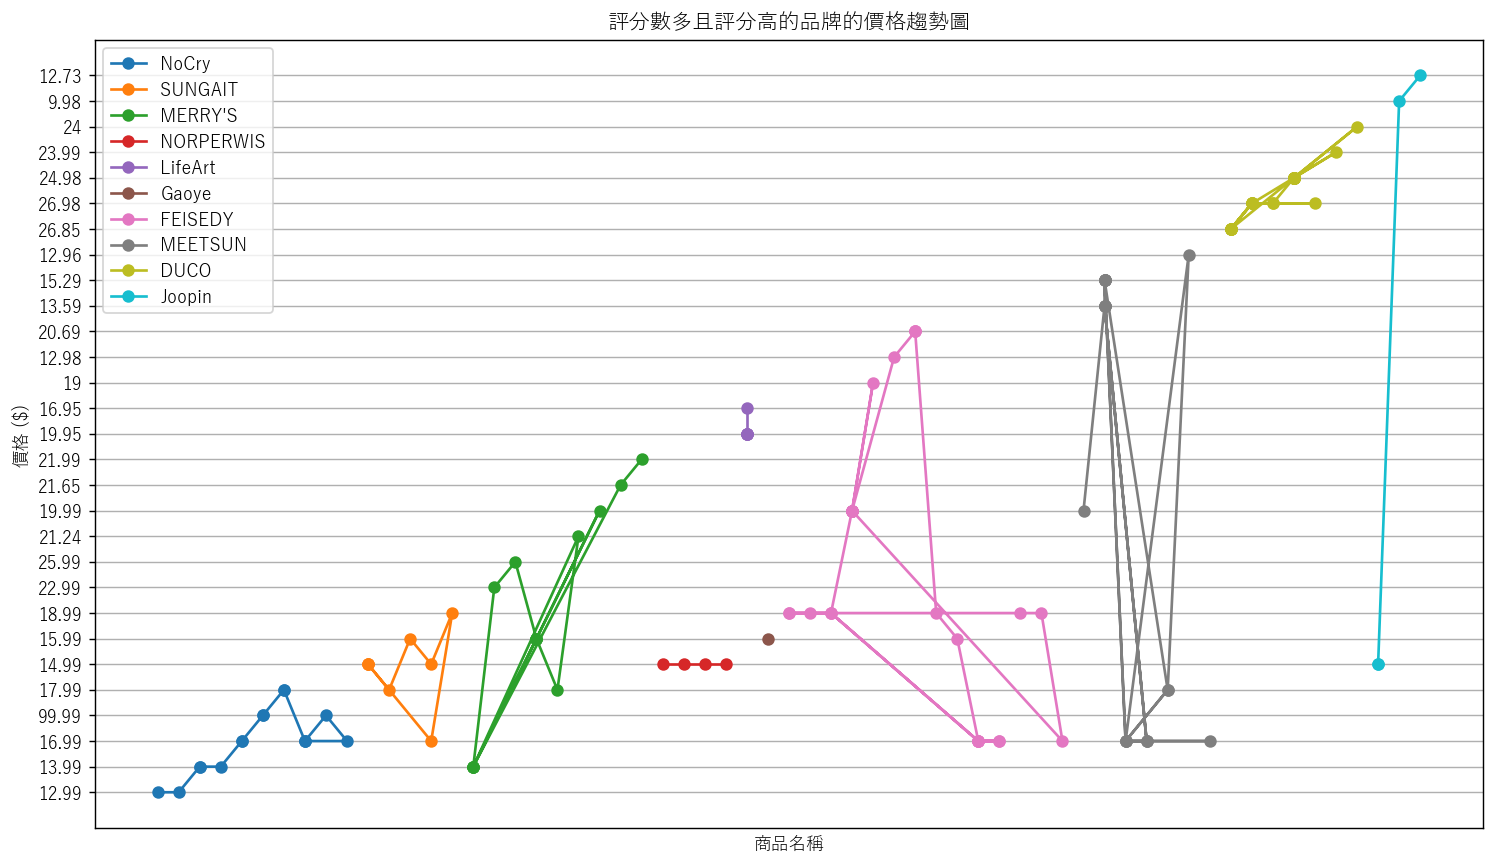

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1400x800 with 0 Axes>

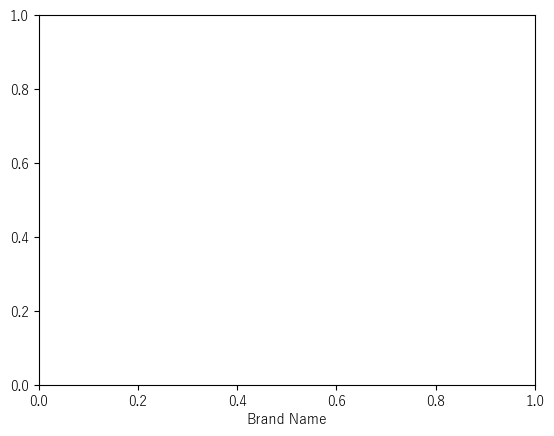

In [14]:

# 選擇評分數多且評分高的前10個品牌
top_brands_rated = df.groupby('Brand Name')['Weighted Rating'].sum().nlargest(10).index
top_brands_scores = df.groupby('Brand Name')['Weighted Rating'].sum().nlargest(10)

print("Top 10 品牌根據評分數多且評分高:")
print(top_brands_rated)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Yu Gothic']
plt.rcParams['axes.unicode_minus'] = False

# 可視化評分數多且評分高的品牌的價格趨勢
plt.figure(figsize=(14, 8), dpi=128)
colors = plt.cm.tab10(range(len(top_brands_rated)))

# 依品牌分組並按品牌排列
df_sorted = df[df['Brand Name'].isin(top_brands_rated)].sort_values(by='Brand Name')

for i, brand in enumerate(top_brands_rated):
    brand_data = df_sorted[df_sorted['Brand Name'] == brand]
    plt.plot(brand_data['Product Name'], brand_data['Price'], label=brand, marker='o', color=colors[i])

plt.xlabel('商品名稱')
plt.ylabel('價格 ($)')
plt.title('評分數多且評分高的品牌的價格趨勢圖')
plt.xticks([])
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# 繪製每個品牌的價格箱型圖
plt.figure(figsize=(14, 8))
df_top_brands_rated = df[df['Brand Name'].isin(top_brands_rated)]
df_top_brands_rated.boxplot(column='Price', by='Brand Name', grid=False, rot=60, patch_artist=True)

# 在箱型圖上添加加權評分的標籤
for i, brand in enumerate(top_brands_rated):
    plt.text(i + 1.4, df_top_brands_rated['Price'].min() - 6, f"{top_brands_scores[brand]:.0f}", 
             horizontalalignment='center', color=colors[i], fontsize=8, rotation=60)

# 修改箱型圖顏色
boxes = plt.gca().artists
for i, box in enumerate(boxes):
    box.set_facecolor(colors[i])

plt.xlabel('品牌名稱')
plt.ylabel('價格 ($)')
plt.title('評分數多且評分高的品牌的價格分佈圖')
plt.suptitle('')  # 移除自動添加的圖表標題
plt.show()